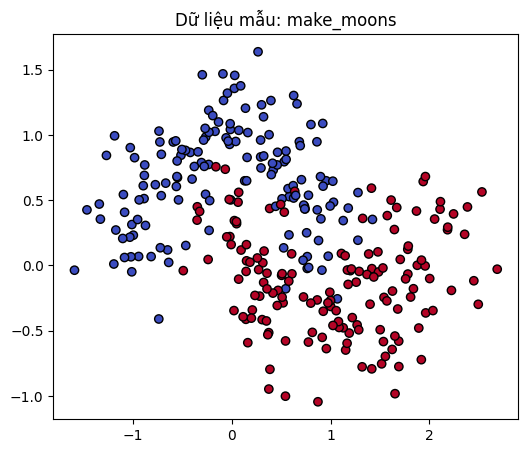

[[ 0.86439552 -0.26450934]
 [ 2.45115375 -0.11754986]
 [-0.35071234  0.44921105]
 [ 0.74129551  0.43291883]
 [ 1.18875554 -0.51830128]]
[1 1 1 0 1]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Tạo dữ liệu phi tuyến
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Plot dữ liệu
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
plt.title("Dữ liệu mẫu: make_moons")
plt.show()

print(X[:5])
print(y[:5])


In [6]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    criterion="gini",      # hoặc "entropy"
    max_depth=5,           # cho đẹp
    random_state=42
)

tree.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


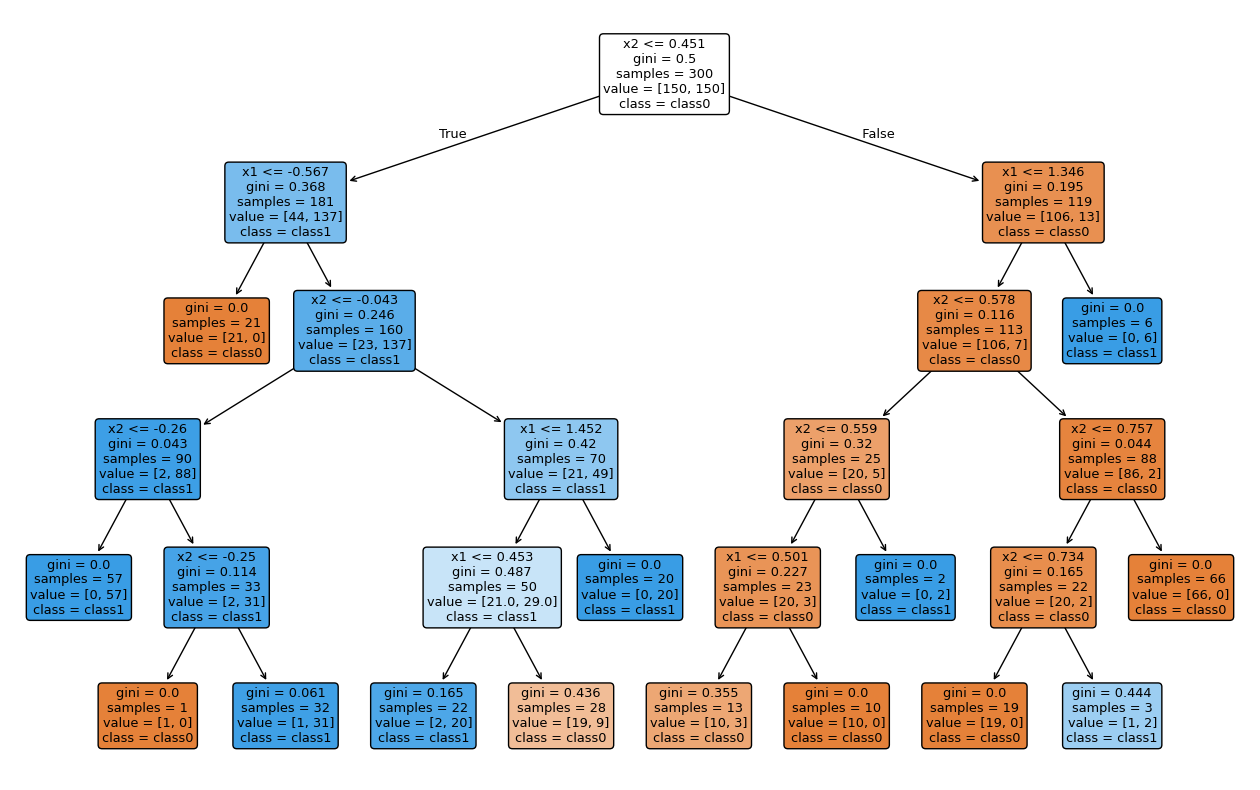

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,10))
plot_tree(
    tree,
    filled=True,
    rounded=True,
    feature_names=["x1", "x2"],
    class_names=["class0","class1"]
)
plt.show()


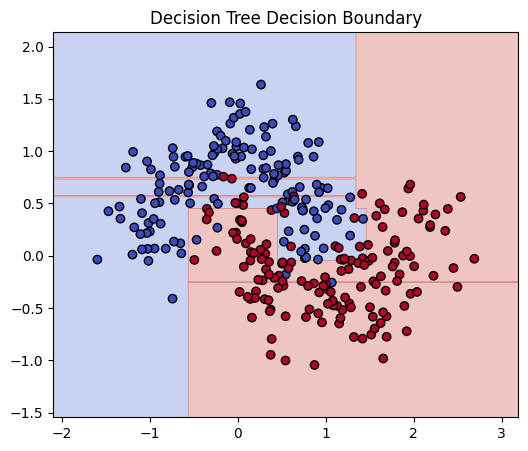

In [8]:
# tạo lưới để vẽ boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# vẽ quyết định
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# vẽ dữ liệu thật
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolor="k")
plt.title("Decision Tree Decision Boundary")
plt.show()

In [ ]:
import pandas as pd

data = {
    "date": [
        "31/02/2024",   # OK
        "31/02/2024",   # Lỗi (tháng 2 không có 31)
        "15/05/2023",   # OK
        "32/01/2022",   # Lỗi ngày 32
        "abc",          # Lỗi ký tự không hợp lệ
        "10/13/2024",   # Lỗi tháng 13
    ]
}

df = pd.DataFrame(data)
print(df)

         date
0  01/12/2024
1  31/02/2024
2  15/05/2023
3  32/01/2022
4         abc
5  10/13/2024
